# Arthur Data Exploring

In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df_beers = pd.read_csv("../data/beer_advocate/beers.csv")
df_users = pd.read_csv("../data/beer_advocate/users.csv")
df_breweries = pd.read_csv("../data/beer_advocate/breweries.csv")
df_users_style_past_ratings = pd.read_csv("../data/beer_advocate/user_beer_style_past_ratings.csv")
df_ratings = pd.read_csv("../data/beer_advocate/ratings.csv")

In [5]:
df_beers.head()

,beer_id,brewery_id,beer_name,beer_style,ratings_count,reviews_count,ratings_average,ratings_ba_score,ratings_bros_score,beer_alcohol_by_volume,ratings_average_computed,zscore,matching_ratings_count,matching_ratings_average,beer_global_style
0,166064,39912,Nashe Moskovskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN,Pale Lager
1,166065,39912,Nashe Pivovskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN,Pale Lager
2,166066,39912,Nashe Shakhterskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN,Pale Lager
3,166067,39912,Nashe Zhigulevskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN,Pale Lager
4,166063,39912,Zhivoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN,Pale Lager


## Looking if the strength of the beer is correlated to the ratings ( alcoolism lol )

In [10]:
df_alcoolisme = df_beers[['beer_alcohol_by_volume', 'ratings_average']].dropna()

In [11]:
df_alcoolisme.head()

,beer_alcohol_by_volume,ratings_average
23,4.5,2.88
24,4.5,3.85
25,4.8,3.45
26,6.0,3.86
27,4.2,3.56


In [13]:
# We want to see if the stronger beers get better reviews

df_alcoolisme['beer_alcohol_by_volume'].quantile([0.25, 0.5, 0.75]).values

array([5. , 6. , 7.5])

<Axes: >

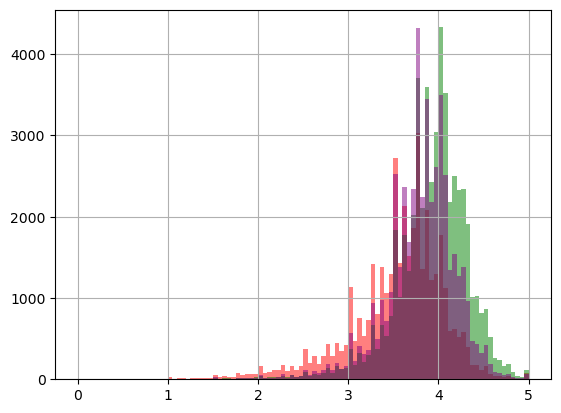

In [16]:
df_alcoolisme[df_alcoolisme['beer_alcohol_by_volume'] < 5]['ratings_average'].hist(bins=100, color='red', alpha=0.5)
df_alcoolisme[df_alcoolisme['beer_alcohol_by_volume'] > 7.5]['ratings_average'].hist(bins=100, color='green', alpha=0.5)
df_alcoolisme[(df_alcoolisme['beer_alcohol_by_volume'] > 6) & (df_alcoolisme['beer_alcohol_by_volume'] < 7.5) ]['ratings_average'].hist(bins=100, color='purple', alpha=0.5)


In [18]:
stats.pearsonr(x=df_alcoolisme['beer_alcohol_by_volume'], y=df_alcoolisme['ratings_average'])

PearsonRResult(statistic=0.28978985542409924, pvalue=0.0)

We see that there is a significant but smalle correlation between the alcool level and the rating of the beer

# Now let's try to construct some serious things to detect some hype periods for some beers

## First a little bit of data exploration

In [47]:
df_ipa = df_beers[df_beers['beer_global_style'] == 'India Pale Ale']

df_ipa.head()

,beer_id,brewery_id,beer_name,beer_style,ratings_count,reviews_count,ratings_average,ratings_ba_score,ratings_bros_score,beer_alcohol_by_volume,ratings_average_computed,zscore,matching_ratings_count,matching_ratings_average,beer_global_style
30,178679,32848,Sheelin IPA,English India Pale Ale (IPA),0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN,India Pale Ale
37,247044,40360,Kaboom,American Double / Imperial IPA,1,0,3.83,NaN,NaN,7.0,3.830000,NaN,0,NaN,India Pale Ale
39,178690,40360,Stitch,American IPA,1,0,3.73,NaN,NaN,5.0,3.730000,NaN,0,NaN,India Pale Ale
50,206082,3415,Ewe Rebel,American IPA,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN,India Pale Ale
52,89841,3415,Hoppelhammer,English India Pale Ale (IPA),13,5,3.85,84.0,NaN,6.0,3.870769,NaN,0,NaN,India Pale Ale


In [48]:
print(f"We have a total number of different IPA beers of {df_ipa['beer_name'].nunique()}")
print(f"Among those we see that the number of ratings per beers have the following quantiles \
{df_ipa['ratings_count'].quantile([0.25, 0.5, 0.75]).values}")

We have a total number of different IPA beers of 41666
Among those we see that the number of ratings per beers have the following quantiles [ 1.  3. 10.]


<Axes: >

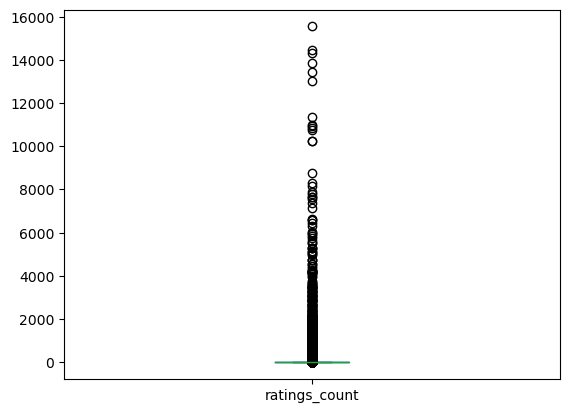

In [49]:
# We see that we have a funny boxplot

df_ipa['ratings_count'].plot(kind='box')

We will now proceed keeping the top 5% of beers with the most amount of ratings counts

In [50]:
df_ipa['ratings_count'].quantile(0.95)

102.0

In [51]:
df_ipa_relevant = df_ipa[df_ipa['ratings_count'] > 102]

### Now let's tackle the ratings

In [58]:
df_ratings['date_week'] = pd.to_datetime(df_ratings['date'], unit="s").dt.to_period('W')
df_ratings['date_day']  = pd.to_datetime(df_ratings['date'], unit="s").dt.round('D')

In [70]:
start_date = '2012-01-01'

df_ratings_post = df_ratings[df_ratings['date_day'] > start_date]

<Axes: title={'center': 'Number of users per week'}, xlabel='Weeks', ylabel='Number of unique users that left a review'>

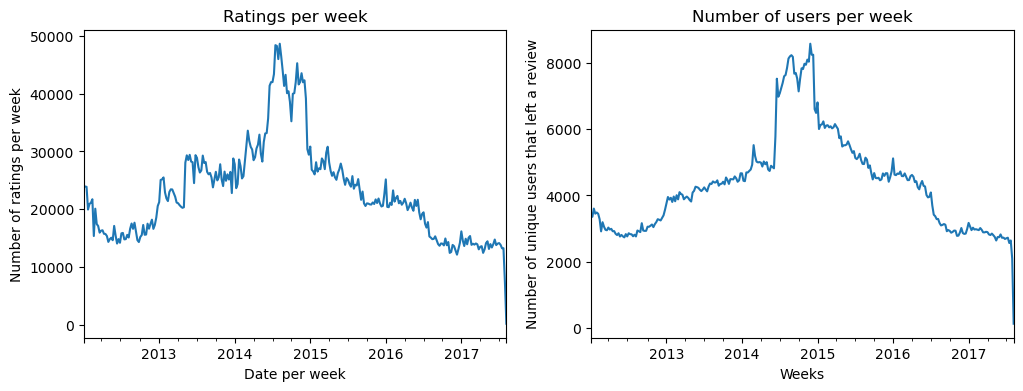

In [82]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

df_ratings_post.groupby(by='date_week').size().plot(
    xlabel='Date per week',
    ylabel='Number of ratings per week',
    title='Ratings per week',
    ax=axs[0]
)

df_ratings_post.groupby(by='date_week')['user_id'].nunique().plot(
    xlabel='Weeks',
    ylabel='Number of unique users that left a review',
    title='Number of users per week',
    ax=axs[1]
)

The two plots are here kind of different ( or not lol ? )

## Now lets tackle the trend analysis


### Time series data frame being set up lol

In [74]:
# Dataframe covering all days on the analysed period
df_dates = pd.DataFrame(index=pd.date_range(
    start=pd.to_datetime(start_date).round('D'),
    end=pd.to_datetime(df_ratings_post['date'].max(), unit='s').round('D'),
freq='D'))

In [90]:
# Dataframe containing the number of ratings per day for each style (with missing days)
df_partial_time_series = df_ratings_post.groupby(['date_day', 'beer_global_style'])['user_id']\
    .nunique()\
    .reset_index(level=1, name='count')\
    .pivot(columns='beer_global_style', values='count')

In [91]:
# Merging and filling NA with 0 in order to have full time series for each style
df_time_series = pd.merge(
    df_dates,
    df_partial_time_series,
    how='left', left_index=True, right_index=True
).fillna(0)

In [92]:
df_time_series.head()

,Bock,Brown Ale,Dark Ales,Dark Lager,Hybrid Beer,India Pale Ale,Low Alcohol Beer,Pale Ale,Pale Lager,Porter,Speciality Beer,Stout,Strong Ale,Wheat Beer,Wild/Sour Beer
2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-02,74.0,90.0,195.0,74.0,44.0,280.0,3.0,273.0,90.0,117.0,116.0,307.0,244.0,96.0,120.0
2012-01-03,65.0,69.0,183.0,63.0,27.0,287.0,4.0,237.0,97.0,92.0,103.0,268.0,196.0,90.0,67.0
2012-01-04,57.0,68.0,155.0,58.0,28.0,229.0,0.0,219.0,94.0,93.0,114.0,240.0,193.0,80.0,70.0
2012-01-05,51.0,87.0,127.0,61.0,20.0,219.0,1.0,206.0,83.0,95.0,94.0,236.0,193.0,74.0,63.0


### Decomposition

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

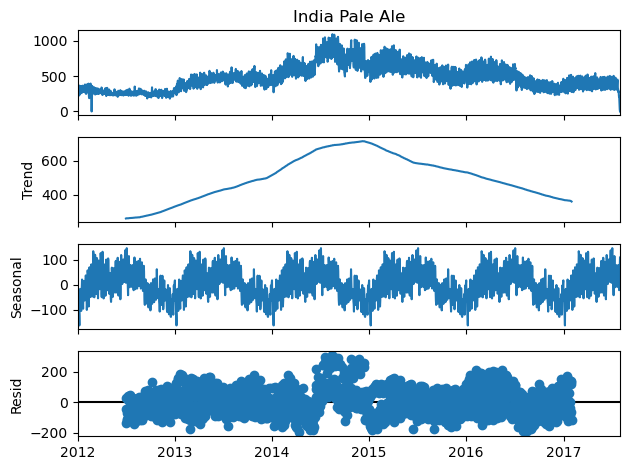

In [94]:
seasonal_decompose(df_time_series['India Pale Ale'], model='additive', period=365).plot()
plt.show()

### Z score approach to determine the hype periods

In [97]:
df_residuals = df_time_series.apply(lambda ts: seasonal_decompose(ts, model='additive', period=365).resid).dropna()

In [98]:
df_residuals = (df_residuals - df_residuals.mean()) / df_residuals.std()

In [99]:
df_residuals.head()

,Bock,Brown Ale,Dark Ales,Dark Lager,Hybrid Beer,India Pale Ale,Low Alcohol Beer,Pale Ale,Pale Lager,Porter,Speciality Beer,Stout,Strong Ale,Wheat Beer,Wild/Sour Beer
2012-07-01,-0.065334,0.630569,0.502928,0.534503,-0.331907,0.294700,-0.633458,0.154444,0.006716,0.533822,1.111986,0.563687,0.339288,0.367513,0.428792
2012-07-02,-0.892560,-0.626799,-0.462286,0.391608,-0.702496,-0.525632,-0.838874,-0.651662,-0.313603,-0.142425,-0.336093,0.136449,0.167344,-0.847124,-0.101484
2012-07-03,-0.430759,-0.242958,-0.571109,-0.782097,-0.494849,-1.533122,-0.635124,-1.560300,-1.654490,-0.337107,-0.496441,-0.180952,-0.139341,-2.043977,-0.934139
2012-07-04,-0.537175,0.017668,-0.300823,-0.434508,-1.823845,-1.332070,0.792794,-1.499822,-1.594840,-0.488657,-1.178239,-0.116494,-0.720108,-1.936180,-1.559233
2012-07-05,-0.604886,-0.136557,-1.122302,0.230765,-0.687717,-1.216392,-1.843747,-1.464872,-1.064662,-0.388324,-0.784531,-0.267172,-0.743575,-1.750054,-1.203807


In [100]:
def plot_hype_period(
        df_residuals: pd.DataFrame, 
        style: str,
        window_size: int = 14,
        intra_threshold: float = 2,
        inter_threshold: float = 2
    ):

    df_residuals_intra = (df_residuals.rolling(window=window_size).mean() - df_residuals.mean()) / df_residuals.std().dropna()
    df_residuals_inter = df_residuals.rolling(window=window_size).mean().dropna().apply(stats.zscore, axis=1)

    serie = df_residuals_intra[style]
    values = serie[(df_residuals_intra[style] > intra_threshold) & (df_residuals_inter[style] > inter_threshold)]

    plt.figure(figsize=(12, 4))
    plt.title(f'[{style}] Normalized residuals (rolling average of {window_size} days) (intra z-score > {intra_threshold}, inter z-score > {inter_threshold})')
    plt.xlabel('Date')
    plt.ylabel('Normalized residuals')
    plt.plot(serie, alpha=0.5)
    plt.scatter(values.index, values, color='red', label='Hype period')
    plt.legend()
    plt.show()

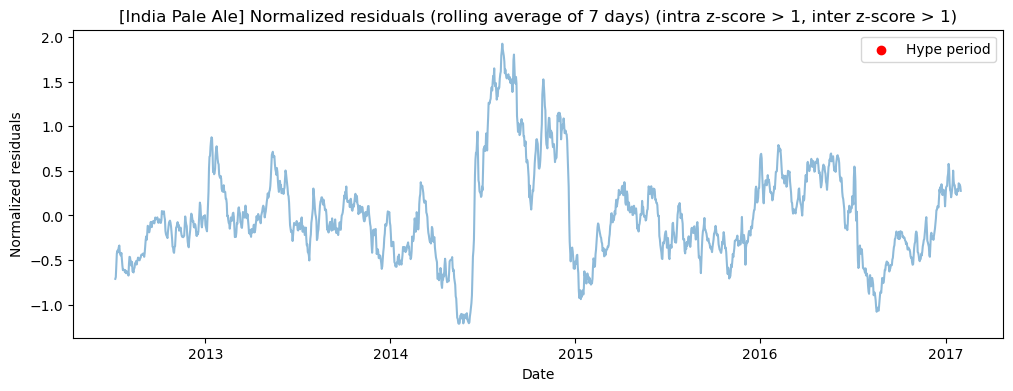

In [108]:
plot_hype_period(df_residuals, 'India Pale Ale', window_size=7, intra_threshold=1, inter_threshold=1)